# Regression Lab

Now have all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate model loss. 

## SWBAT

* Run a complete regression analysis through code only. 

## Here are all the formulas to put everything in perspective

#### Slope
<img src="m.png" width = 300>

#### Intercept 
<img src="b.png" width = 200>

#### R-squared
<img src="r2.png" width = 400>

#### Prediction
![](pred.jpg)


Use the functions created earlier to implement these formulas to run a regression analysis using X and Y as input variables. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
def get_slope(var1, var2):
    num = np.mean(var1)*np.mean(var2) - np.mean(var1*var2)
    denom = np.mean(var1)**2 - np.mean(var1**2)
    return num/denom

def get_intercept(var1, var2):
    slope = get_slope(var1, var2)
    intercept = np.mean(var2) - slope*np.mean(var1)
    return round(slope, 2), round(intercept, 2)

def get_predicted(var1, var2):
    m, b = get_intercept(var1, var2)
    var2_predicted = []
    for var in var1:
        var2_predicted.append(m*var + b)
    return np.array(var2_predicted)

def sq_err(ys_a, ys_b):
    ss_tot = 0
    for i in range(0, len(ys_a)):
        ss_tot += (ys_a[i] - ys_b[i])**2
    return ss_tot

def r_squared(var1, var2):
    avg = np.mean(var2)
    var2_predicted = get_predicted(var1, var2)
    sse = sq_err(var2, var2_predicted)
    sst = 0
    for y in var2:
        sst += (y - var2.mean()) ** 2
    r_squared = 1 - (sse/sst)
    return round(r_squared, 2)

def regression_line(m, b, var1):
    var2 = []
    for x in var1:
        var2.append(m*x + b)
    return var2

In [6]:
X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)
print(X);print(Y)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 7.  7.  8.  9.  9. 10. 10. 11. 11. 12.]


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


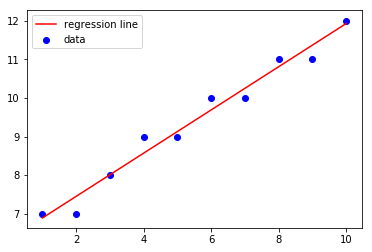

In [7]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

m, b = get_intercept(X, Y)
reg_line = regression_line(m, b, X)
r_squar = r_squared(X, Y)

print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope: {}'.format(m))
print('Y-Intercept: {}'.format(b))
print('R-Squared: {}'.format(r_squar))
print('----------------------------')
print('Model: Y = {} * X + {}'.format(m, b))


plt.scatter(X, Y, label='data', color='blue')
plt.plot(X, reg_line, label='regression line', color='red')
plt.legend()
plt.show()

## Make Predictions

Predict and plot the value of y using regression line above for a new value of x = 4.5.

In [8]:
# Make prediction using given value and visualize on the scatter plot
def prediction(m, b, x):
    return round(m*x + b, 1)

x = 4.5
pred_y = prediction(m, b, x)

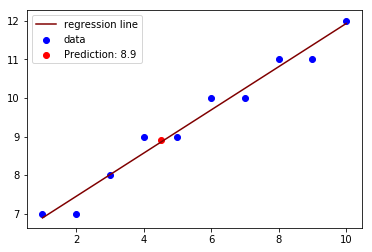

In [9]:
plt.scatter(X, Y, label='data', color='blue')
plt.plot(X, reg_line, label='regression line', color='maroon')
plt.scatter(x, pred_y, label='Prediction: {}'.format(pred_y), color='red')
plt.legend()
plt.show()

## Level up - Optional 
Load the "heightWeight.csv" dataset. Use the height as an independant and weight as a dependant variable and draw a regression line to data using your code above. Calculate your R-square for the model and try to predict new values of Y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next We shall see how we can use python's built in modules to perform such analyses with a much higher level of sophistication. 